In [33]:
# example of face detection with mtcnn
from flask import Flask, request
import base64
import cv2
import numpy as np
from flask_cors import CORS
from PIL import Image
from numpy import asarray, expand_dims
from scipy.spatial.distance import cosine
from mtcnn.mtcnn import MTCNN
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
from datetime import datetime
from matplotlib import pyplot
import os
import pandas as pd

In [17]:
def extract_face(filename, required_size=(224, 224)):
	# load image from file
	pixels = pyplot.imread(filename)
	# create the detector, using default weights
	detector = MTCNN()
	try: 
		# detect faces in the image
		results = detector.detect_faces(pixels)
		# extract the bounding box from the first face
		x1, y1, width, height = results[0]['box']
	except:
		return None
	
	x2, y2 = x1 + width, y1 + height
	# extract the face
	face = pixels[y1:y2, x1:x2]
	# resize pixels to the model size
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array

1/1 [==============================] - 0s 271ms/step


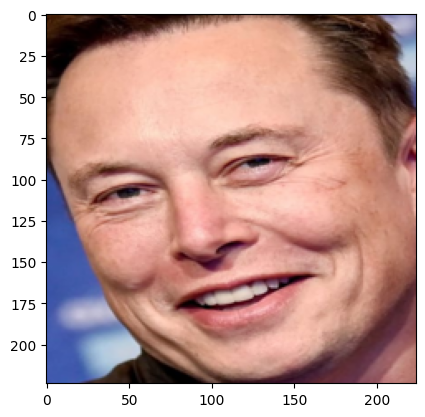

1/1 [==============================] - 3s 3s/step


In [37]:
pixels = extract_face('elon_musk_1.jpg')
pyplot.imshow(pixels)
pyplot.show()
pixels = pixels.astype('float32')
samples = expand_dims(pixels, axis=0)
samples = preprocess_input(samples, version=2)
model = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3), pooling='avg')
yhat = model.predict(samples)

In [35]:
import os
database_path = [os.path.join("database", image) for image in os.listdir("database")]

In [47]:
os.listdir("database")

['chris_evan.jpg', 'elon_musk.jpg']

In [36]:
database = get_embeddings(database_path)

1/1 [==============================] - 2s 2s/step


In [48]:
cosine_similarity = [cosine(yhat[0], item) for item in database]

In [45]:
len(yhat[0])

2048

In [41]:
database[0]

array([4.21537971e+00, 1.08251415e-01, 4.78698778e+00, ...,
       2.60374974e-03, 4.45032167e+00, 3.86824422e-02], dtype=float32)

In [43]:
len(database[0])

2048

In [64]:
database = pd.DataFrame(data = {"name" : os.listdir("database"), "cosine" : cosine_similarity})

In [68]:
database

,name,cosine
0,elon_musk.jpg,1.192093e-07
1,chris_evan.jpg,7.698596e-01


In [66]:
database = database.sort_values(by=['cosine'], ignore_index=True)

In [67]:
database['cosine'][0]

1.1920928955078125e-07

In [70]:
name = os.path.splitext(database['name'][0])[0]
name = name.replace("_", " ").split(" ")
name = " ".join( i.capitalize() for i in name)
name

'Elon Musk'